<a href="https://colab.research.google.com/github/mystlee/2024_CSU_AI_class/blob/main/%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C%EB%A5%BC_%ED%86%B5%ED%95%9C_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**python을 이용한 PCA example**

<ipython-input-20-f2a4e0f5ae3b>:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov, 100)


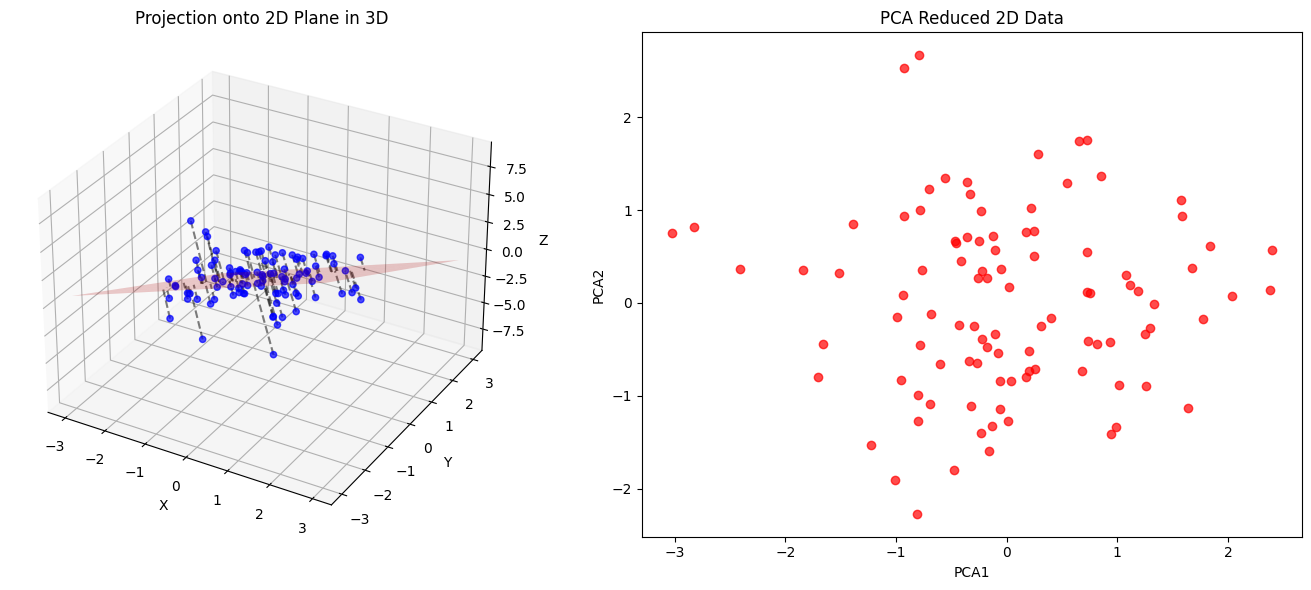

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# 3D 데이터 생성
np.random.seed(42)
mean = [0, 0, 0]
# 공분산 행렬 (임의로 설정)
cov = [[1, 0.3, 0.1], [0.3, 1, 0.2], [0.2, 0.3, 1]] # 여기서 공분산은 PCA에 사용되는 공분산이 아님! 단순하게 random값을 생성하기 위함
data = np.random.multivariate_normal(mean, cov, 100)

# PCA 모델 생성 (3차원에서 2차원으로 축소)
pca = PCA(n_components = 2)
data_2d = pca.fit_transform(data)

# PCA 주성분 벡터 추출
components = pca.components_

# 원본 3차원 데이터 시각화 (입력 데이터)
fig = plt.figure(figsize=(14, 6))

# 3D plot: 원본 데이터와 투영된 평면
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o', alpha=0.7, label='Original 3D Data')

# PCA 평면 정의 (첫 번째 차원과 두 번째 차원의 주성분 사용)
mean_data = np.mean(data, axis = 0)
pca_plane_normal = np.cross(components[0], components[1])

# plot을 위한 평면 범위를 정의 (PCA 평면)
xlim = np.linspace(-3, 3, 10)
ylim = np.linspace(-3, 3, 10)
X, Y = np.meshgrid(xlim, ylim)

# PCA 주성분 공간에 맞춘 평면을 정의
Z = mean_data[2] + (-pca_plane_normal[0] * (X - mean_data[0]) - pca_plane_normal[1] * (Y - mean_data[1])) / pca_plane_normal[2]

# PCA 평면 시각화
ax.plot_surface(X, Y, Z, alpha=0.2, color='red')

# 3D 데이터에서 2D로 투영된 선 시각화
for i in range(data.shape[0]):
    projected_point = np.dot(components.T, data_2d[i]) + mean_data
    ax.plot([data[i, 0], projected_point[0]], [data[i, 1], projected_point[1]], [data[i, 2], projected_point[2]], 'k--', alpha=0.5)

ax.set_title('Projection onto 2D Plane in 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 2D plot: PCA로 축소된 데이터
ax2 = fig.add_subplot(122)
ax2.scatter(data_2d[:, 0], data_2d[:, 1], c='red', marker='o', alpha=0.7)
ax2.set_title('PCA Reduced 2D Data')
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')

plt.tight_layout()
plt.show()


**UMAP를 이용한 고차원 --> 저차원 예시**

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


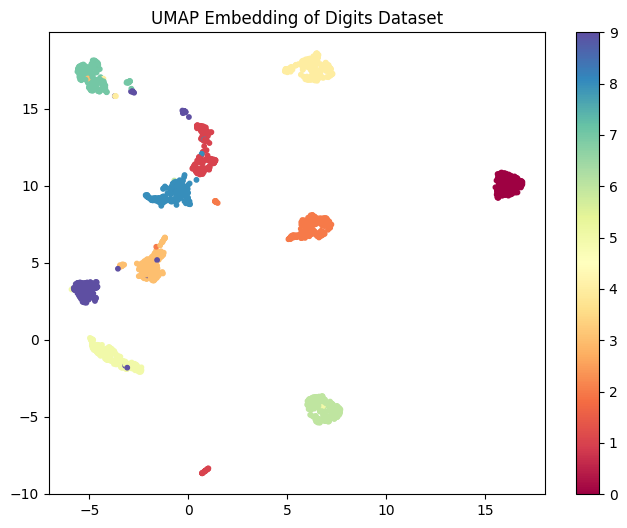

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# 데이터 로드 (예시로 손글씨 숫자 데이터 사용)
digits = load_digits()
data = digits.data

# UMAP 모델 생성 및 학습
umap_model = umap.UMAP(n_components = 2, random_state = 42)
umap_embedding = umap_model.fit_transform(data)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=digits.target, cmap='Spectral', s=10)
plt.colorbar()
plt.title('UMAP Embedding of Digits Dataset')
plt.show()


**t-SNE를 이용한 고차원 --> 저차원 예시**

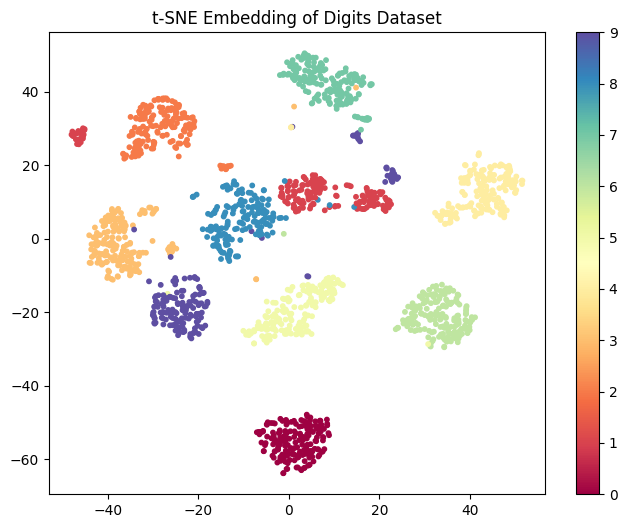

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# 데이터 로드 (예시로 손글씨 숫자 데이터 사용)
digits = load_digits()
data = digits.data

# t-SNE 모델 생성 및 학습
tsne_model = TSNE(n_components = 2, random_state = 42)
tsne_embedding = tsne_model.fit_transform(data)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=digits.target, cmap='Spectral', s=10)
plt.colorbar()
plt.title('t-SNE Embedding of Digits Dataset')
plt.show()
